## Data Set Description :

 ### There are 6 variables in this data set:
 ### Age: Age of patient
 ### Sex: Gender of patient
 ### BP: Blood pressure of patient
 ### Cholesterol: Cholesterol of patient
 ### Na_to_K: Sodium to Potassium Ratio in Blood
 ### Drug: Drug Type

 ## Data Set Problem :

###The dataset contains patient information and diagnoses aimed at predicting the appropriate medicine classification. A machine learning model will be employed to predict which drug type best matches each patient's needs based on their data.

## 1. Import important Library 📚

👉 Importing libraries that will be used in this notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report,precision_score , recall_score ,f1_score
# Import the necessary modelling algos.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## 2. Reading Data Set 👓

👉 After importing libraries, we will also import the dataset that will be used.

In [ ]:
df = pd.read_csv('Drug_Classification/drug200.csv',na_values={' ','?'})

👉 Read the first 5 rows in the dataset.

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


👉 Data type and checking null in dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 200 entries, 0 to 199

Data columns (total 6 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   Age          200 non-null    int64  

 1   Sex          200 non-null    object 

 2   BP           200 non-null    object 

 3   Cholesterol  200 non-null    object 

 4   Na_to_K      200 non-null    float64

 5   Drug         200 non-null    object 

dtypes: float64(1), int64(1), object(4)

memory usage: 9.5+ KB


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

👉 From the results above, there are no missing/null value in this dataset

In [ ]:
df.duplicated().sum()

0

👉 There is no Duplicates

## 3. Data Set Exploration

In [ ]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

### 3.1   Age Variable

count    200.000000

mean      44.315000

std       16.544315

min       15.000000

25%       31.000000

50%       45.000000

75%       58.000000

max       74.000000

Name: Age, dtype: float64


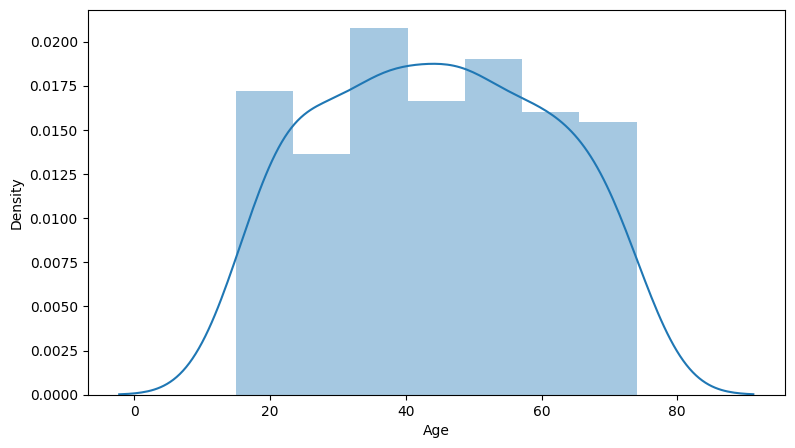

In [ ]:
print(df.Age.describe())

plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

👉 Age range is between 15 and 74 and the distribution of 'Age' column is symetric .

### 3.2 Sex Variable

Sex

M    104

F     96

Name: count, dtype: int64


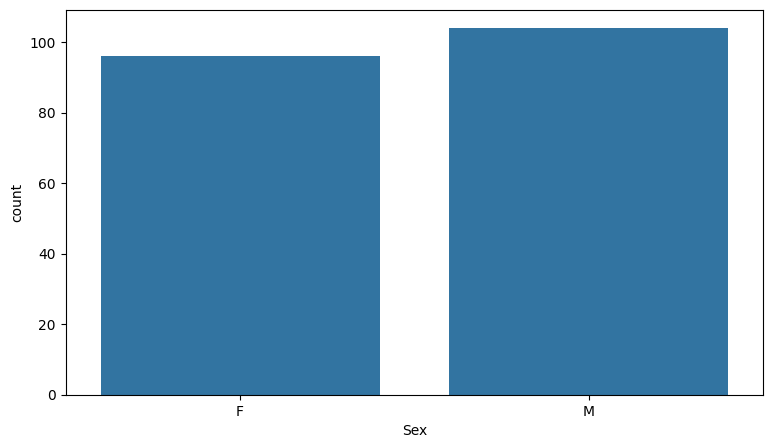

In [ ]:
print(df.Sex.value_counts())

plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

👉 The distribution of patient gender is almost balanced and this is a categorical variable , It would be better to apply encoding to avoid any error during model implementation.

### 3.3 BP Variable

BP

HIGH      77

LOW       64

NORMAL    59

Name: count, dtype: int64


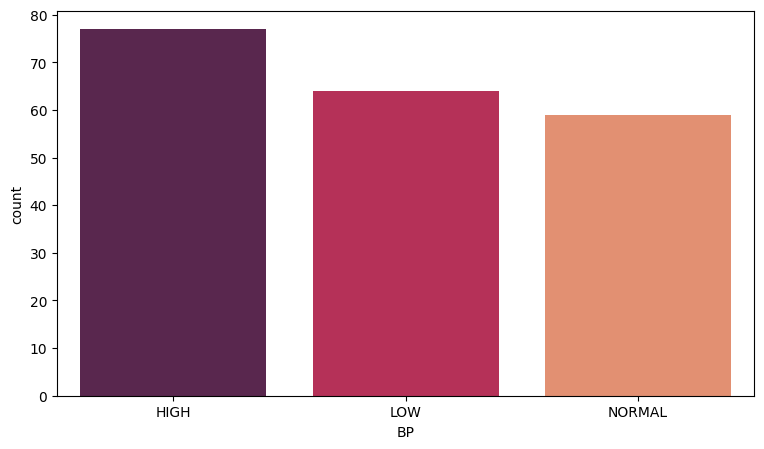

In [ ]:
print(df.BP.value_counts())

plt.figure(figsize=(9,5))
sns.countplot(x = df.BP,palette="rocket")
plt.show()

👉 The distribution of BP level is almost balanced and It would be better to apply encoding on it .

### 3.4 Cholesterol Variable

Cholesterol

HIGH      103

NORMAL     97

Name: count, dtype: int64


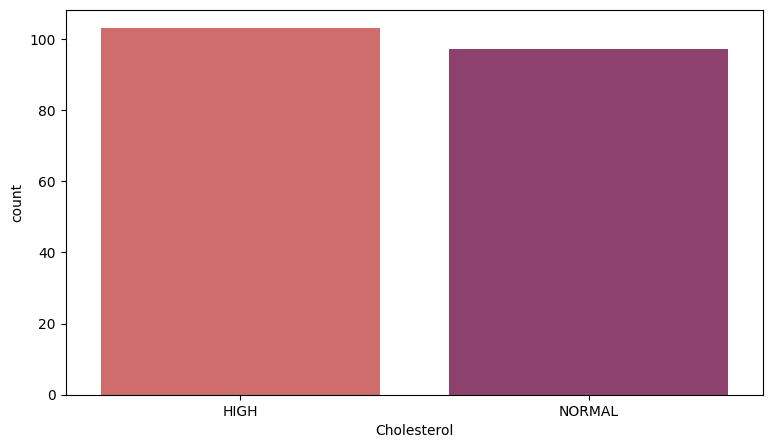

In [ ]:
print(df.Cholesterol.value_counts())

plt.figure(figsize=(9,5))
sns.countplot(x = df.Cholesterol,palette="flare")
plt.show()

👉 The distribution of cholesterol level is balanced and  It would be better to apply encodingon it .

### 3.5  Na_to_K Variable  

count    200.000000

mean      16.084485

std        7.223956

min        6.269000

25%       10.445500

50%       13.936500

75%       19.380000

max       38.247000

Name: Na_to_K, dtype: float64


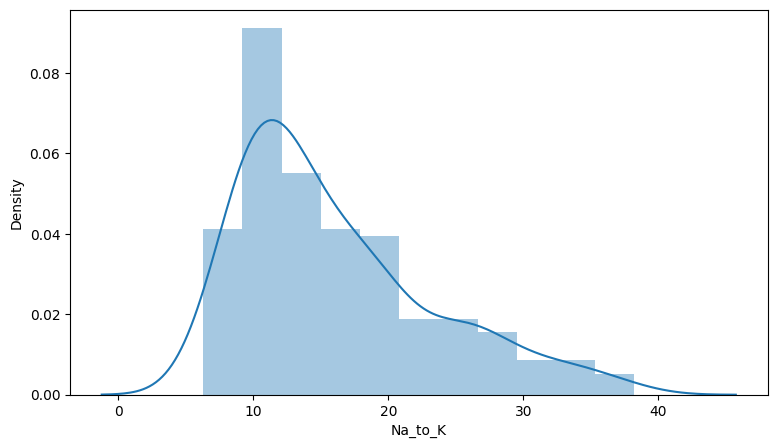

In [ ]:
print(df.Na_to_K.describe())

plt.figure(figsize = (9,5))
sns.distplot(df.Na_to_K)
plt.show()

👉The distribution of 'Na_to_K' column is moderately skewed

### 3.6  Drug Variable

Drug

DrugY    91

drugX    54

drugA    23

drugC    16

drugB    16

Name: count, dtype: int64


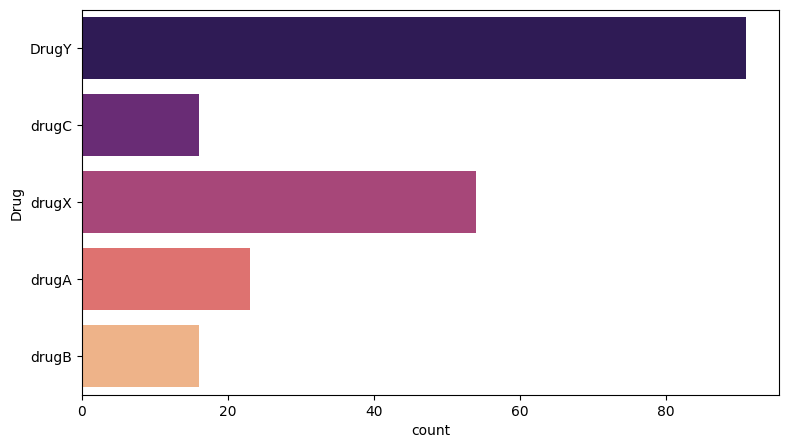

In [ ]:
print(df.Drug.value_counts())

plt.figure(figsize = (9,5))
sns.countplot(df.Drug,palette="magma")
plt.show()

👉Drug is target column and it is unbalanced dataset ,the number of 'DrugY' is more than other types of drugs and we need oversampling

## 4. Visualization  

###  4.1 Columns Age and Drug

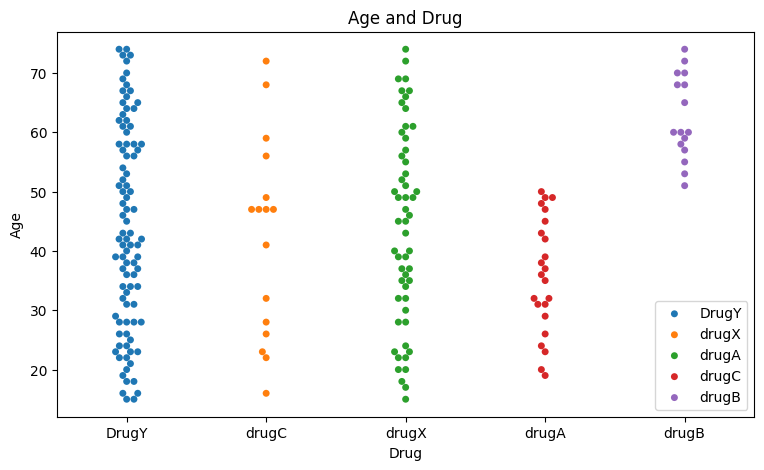

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",hue = 'Drug',data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age and Drug")
plt.show()

👉 From the plot above , DrugA is taken only by younger than 50 years old and DrugB is taken only by older than 51 years old.

### 4.2 Columns Sex and Drug

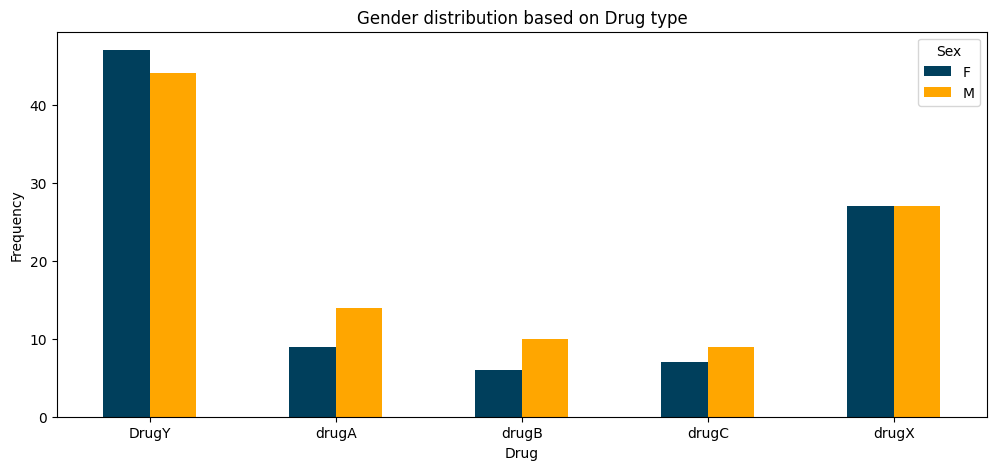

In [ ]:
pd.crosstab(df.Drug,df.Sex).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Drug')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

👉  From the plot above ,Female people got DrugY more than male people .
    drugX is equal for male and female.
    Male got drugA, drugB and drugC more than female.

### 4.2 Columns BP and Drug

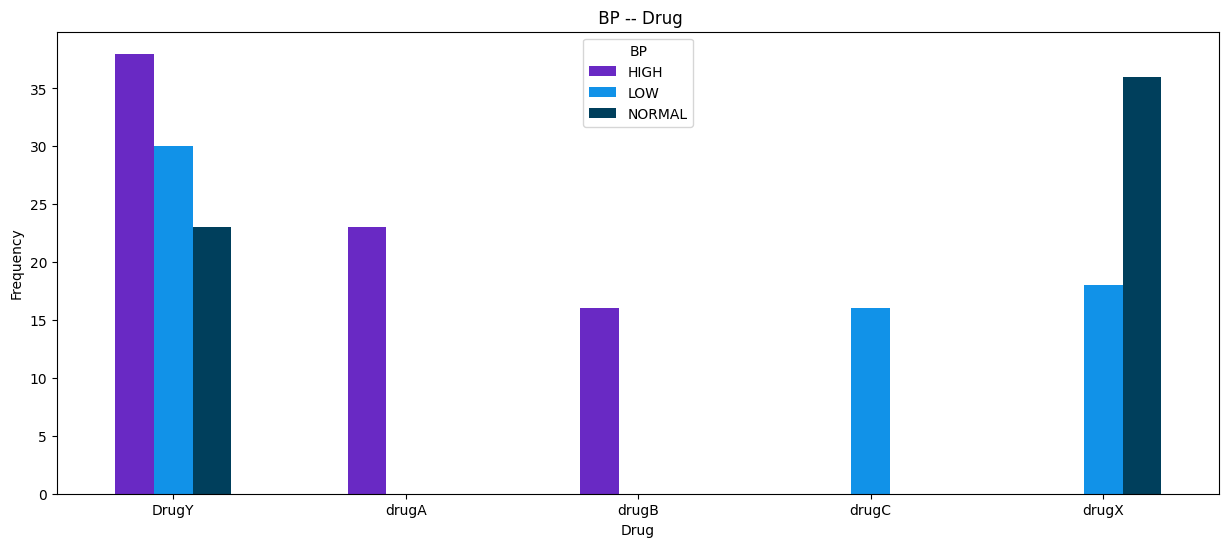

In [ ]:
pd.crosstab(df.Drug,df.BP).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8','#003f5c'])
plt.title(' BP -- Drug')
plt.xlabel('Drug')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

👉 From the plot above , drugA and drugB are got only by people who have HIGH blood pressure and drugC is got by people who have LOW blood pressure. and drugX is got by people who have not HIGH blood pressure.

### 4.3 Columns Na_to_K and Drug

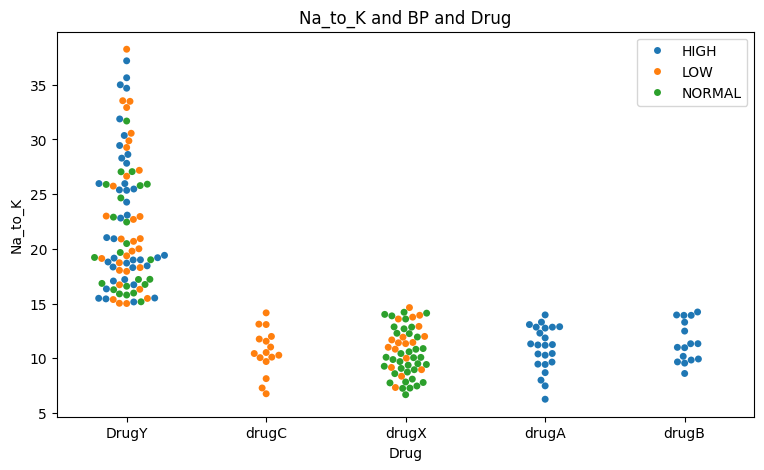

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K and BP and Drug")
plt.show()

👉 From result plot above , the people have low blood pressure and Na_to_K is less than 15 they got drugC ,
    and the people have HIGH blood pressure and Na_to_K is less than 15 they got drugA and drugB , but people with every
    blood pressure and Na_to_K is more than 15 they got drugY .

## 5. Data Set Preparation

### 5.1 Split Data to X , Y

In [ ]:
x = df.drop('Drug' , axis = 1)
y = df['Drug']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

### 5.2 split data to train , test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42 , shuffle = True)

print (f'x_train shape : {x_train.shape} , ', f'x_test shape :{x_test.shape} , ',f'y_train shape : {y_train.shape} , '
       ,f'y_test shape :{ y_test.shape}')

x_train shape : (160, 5) ,  x_test shape :(40, 5) ,  y_train shape : (160,) ,  y_test shape :(40,)


### 5.2 encoding the categorical columns

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
cat_x = x.select_dtypes(include=['category' , 'object']).columns
num_x= x.select_dtypes(include=['int' , 'float']).columns

In [ ]:
encoder=OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()

In [ ]:
ct = ColumnTransformer(transformers=[ ('scaler',sc,num_x),
                                      ('encoder', encoder,cat_x )],
                       remainder='passthrough',)

In [ ]:
print('X_train.shape before Columntransformer',x_train.shape)

x_train=ct.fit_transform(x_train)
print('X_train.shape after Columntransformer',x_train.shape)

X_train.shape before Columntransformer (160, 5)

X_train.shape after Columntransformer (160, 9)


In [ ]:
x_train=pd.DataFrame(x_train, columns=ct.get_feature_names_out())
x_train

,scaler__Age,scaler__Na_to_K,encoder__Sex_F,encoder__Sex_M,encoder__BP_HIGH,encoder__BP_LOW,encoder__BP_NORMAL,encoder__Cholesterol_HIGH,encoder__Cholesterol_NORMAL
0,-0.834056,-0.740459,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.411966,-0.871267,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.397948,-0.896848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.771755,2.390909,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.709454,0.865739,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
155,-1.457067,-0.586559,0.0,1.0,0.0,0.0,1.0,1.0,0.0
156,0.287364,-0.482853,1.0,0.0,0.0,0.0,1.0,1.0,0.0
157,-1.020959,1.832832,1.0,0.0,1.0,0.0,0.0,1.0,0.0
158,1.346482,-0.042034,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
x_test=ct.transform(x_test)
x_test.shape

(40, 9)

In [ ]:
x_test=pd.DataFrame(x_test, columns=ct.get_feature_names_out())
x_test.head()

,scaler__Age,scaler__Na_to_K,encoder__Sex_F,encoder__Sex_M,encoder__BP_HIGH,encoder__BP_LOW,encoder__BP_NORMAL,encoder__Cholesterol_HIGH,encoder__Cholesterol_NORMAL
0,-0.584851,-0.659707,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-1.830873,-0.093887,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.706271,-1.029453,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.848073,-0.795216,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.100460,2.398652,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### 5.3 Balance Target

The target column wasn't balanced , for having better result and accuracy from model on each class in target we need to balance the target column.

In [ ]:
sm = SMOTE()
x_train , y_train =sm.fit_resample(x_train , y_train)

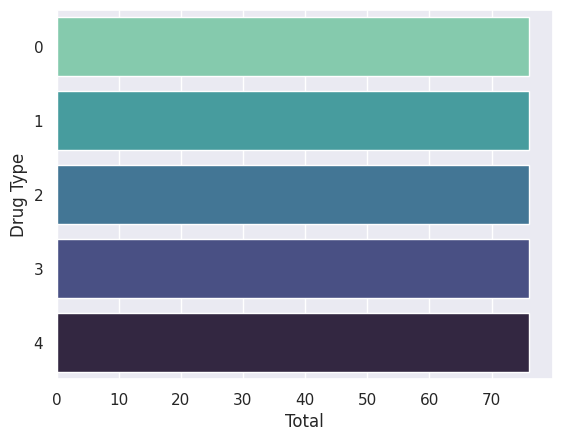

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

## 6. Model

### Classification Functions for Machine Learning Algorithms

In [ ]:
def fitandeval (model , par , X_train=x_train , X_test=x_test , y_train=y_train , y_test=y_test):
  grid = GridSearchCV(model, par)
  grid.fit(X_train , y_train)
  best_model=grid.best_estimator_
  print(f'optimized hyperparameters are {grid.best_params_}')
  y_pred_train=best_model.predict(X_train)

  y_pred=best_model.predict(X_test)

  print(classification_report(y_test, y_pred))
  # print(confusion_matrix(y_test, y_pred))
  print(f'the train accuracy is :{accuracy_score(y_train, y_pred_train)}')
  print(f'the test accuracy is : {accuracy_score(y_test, y_pred)}')

  acc_train=accuracy_score(y_train, y_pred_train)
  precision_train=precision_score(y_train, y_pred_train,average='weighted')
  recall_train=recall_score(y_train, y_pred_train,average='weighted')
  f1_train=f1_score(y_train, y_pred_train,average='micro' )


  acc_test=accuracy_score(y_test, y_pred)
  precision_test=precision_score(y_test, y_pred ,average='weighted')
  recall_test=recall_score(y_test, y_pred,average='weighted')
  f1_test=f1_score(y_test, y_pred,average='micro')
  print()

  print()
  print('#######################')
  print()
  print ('Confusion Matrix : ')
  cf=confusion_matrix(y_test , y_pred)
  sns.heatmap(cf, annot=True, cmap='magma')

  return best_model # acc_test , recall_test , precision_test , f1_test ,


### 6.1 DecisionTreeClassifier


optimized hyperparameters are {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

              precision    recall  f1-score   support



           0       1.00      1.00      1.00        15

           1       1.00      1.00      1.00         6

           2       1.00      1.00      1.00         3

           3       0.45      1.00      0.62         5

           4       1.00      0.45      0.62        11



    accuracy                           0.85        40

   macro avg       0.89      0.89      0.85        40

weighted avg       0.93      0.85      0.85        40



the train accuracy is :0.9473684210526315

the test accuracy is : 0.85





#######################



Confusion Matrix : 


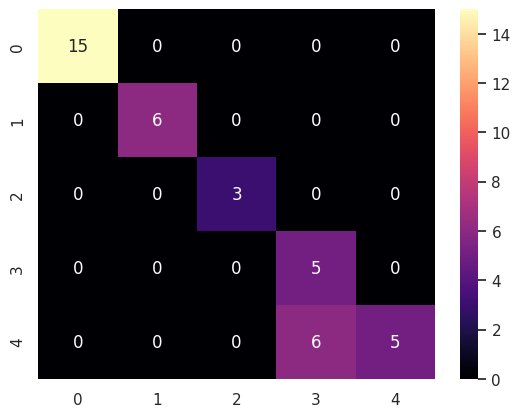

In [ ]:
parameters_DT ={
    'max_depth': [2,3],
    'min_samples_leaf': [1,3,5],
    'min_samples_split' :[1,3,5],
    'criterion': ["entropy",'gini']
}
best_model_DT=fitandeval(DecisionTreeClassifier(),parameters_DT)

### 6.2 Random Forest Classifire

optimized hyperparameters are {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 6}

              precision    recall  f1-score   support



           0       1.00      0.87      0.93        15

           1       0.75      1.00      0.86         6

           2       1.00      1.00      1.00         3

           3       1.00      1.00      1.00         5

           4       1.00      1.00      1.00        11



    accuracy                           0.95        40

   macro avg       0.95      0.97      0.96        40

weighted avg       0.96      0.95      0.95        40



the train accuracy is :0.9789473684210527

the test accuracy is : 0.95





#######################



Confusion Matrix : 


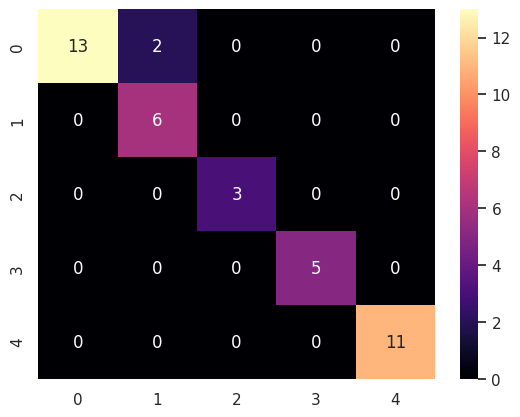

In [ ]:
parameters_RF = { 'n_estimators': [ 5,6,7,8],
    'max_depth' : [1,2,3],
    'criterion' :['gini','entropy']
              }
best_model_RF=fitandeval(RandomForestClassifier(random_state=11),parameters_RF)

### 6.3 SVM classifier

optimized hyperparameters are {'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}

              precision    recall  f1-score   support



           0       1.00      0.93      0.97        15

           1       0.86      1.00      0.92         6

           2       1.00      1.00      1.00         3

           3       1.00      1.00      1.00         5

           4       1.00      1.00      1.00        11



    accuracy                           0.97        40

   macro avg       0.97      0.99      0.98        40

weighted avg       0.98      0.97      0.98        40



the train accuracy is :0.9789473684210527

the test accuracy is : 0.975





#######################



Confusion Matrix : 


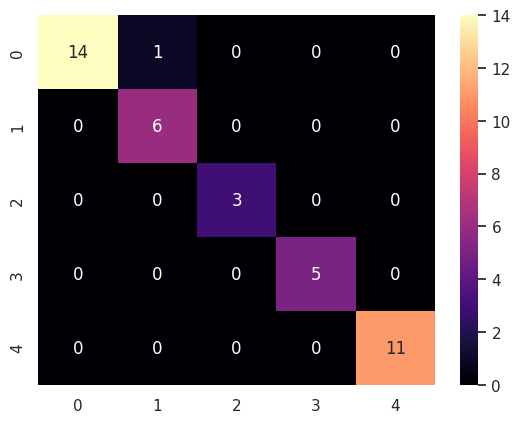

In [ ]:
parameters_SVC = {'C': [0.1,0.01,0.2,0.7,0.9,10],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['sigmoid']}

best_model_SVC=fitandeval(SVC(),parameters_SVC)

### 6.4 KNeighborsClassifier

optimized hyperparameters are {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

              precision    recall  f1-score   support



           0       0.88      0.93      0.90        15

           1       1.00      1.00      1.00         6

           2       1.00      1.00      1.00         3

           3       1.00      1.00      1.00         5

           4       0.90      0.82      0.86        11



    accuracy                           0.93        40

   macro avg       0.96      0.95      0.95        40

weighted avg       0.93      0.93      0.92        40



the train accuracy is :0.9657894736842105

the test accuracy is : 0.925





#######################



Confusion Matrix : 


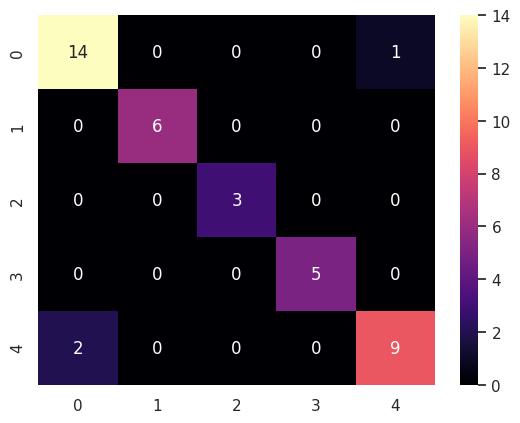

In [ ]:
parameters_knn = {'n_neighbors':[3,5,7,9],
        'p':np.arange(1,3),
        'weights':['uniform']
       }

best_model_knn=fitandeval(KNeighborsClassifier(),parameters_knn)

### 6.5 LogisticRegression

optimized hyperparameters are {'max_iter': 15, 'solver': 'lbfgs'}

              precision    recall  f1-score   support



           0       1.00      0.93      0.97        15

           1       0.86      1.00      0.92         6

           2       1.00      1.00      1.00         3

           3       1.00      1.00      1.00         5

           4       1.00      1.00      1.00        11



    accuracy                           0.97        40

   macro avg       0.97      0.99      0.98        40

weighted avg       0.98      0.97      0.98        40



the train accuracy is :0.9763157894736842

the test accuracy is : 0.975





#######################



Confusion Matrix : 


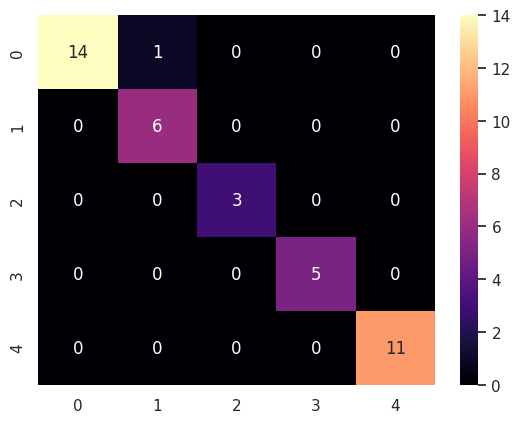

In [ ]:
parameters_lg = {'solver':['lbfgs'],
                 'max_iter':[10,15,20,30,50]}

best_model_lg=fitandeval(LogisticRegression(),parameters_lg)

## Compare the result of Model

In [ ]:
dic_result = {'Decision Tree':0.85,
          'Random Forest':0.95,
          'SVC':0.97,
          'knn':0.92,
          'LogisticRegression':0.97}

result = pd.DataFrame.from_dict(dic_result,orient='index',columns=['Score'])
result

,Score
Decision Tree,0.85
Random Forest,0.95
SVC,0.97
knn,0.92
LogisticRegression,0.97


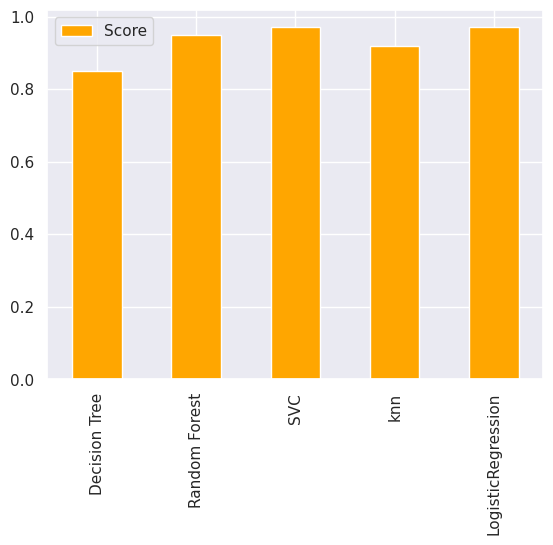

In [ ]:
result.plot(kind='bar',color = '#ffa600')
plt.show()

Random Forest classifier and SVM classifier and LogisticRegression (with hyperparameter tuning) have a good scores.